#### Problem 179
Find the number of integers 1 < n < 107, for which n and n + 1 have the same number of positive divisors. For example, 14 has the positive divisors 1, 2, 7, 14 while 15 has 1, 3, 5, 15.

In [1]:
import functools
import itertools
import operator

In [6]:
def prime_generator(n):
    """
    Sieve of Eratosthenes
    Create a candidate list within which non-primes will be
    marked as None.
    """    
    cand = [i for i in range(3, n + 1, 2)]
    end = int(n ** 0.5) // 2

    # Loop over candidates (cand), marking out each multiple.
    for i in range(end):
        if cand[i]:
            cand[cand[i] + i::cand[i]] = [None] * (
                (n // cand[i]) - (n // (2 * cand[i])) - 1)

    # Filter out non-primes and return the list.
    return [2] + [i for i in cand if i]

In [7]:
primes_list = prime_generator(100000)

In [8]:
def how_many_times_divides(n, div):
    """
    >>> list(how_many_times_divides(40, 2))
    [2, 2, 2]
    """
    while n > 1:
        if n % div != 0:
            break
        n //= div
        yield div
        
def factorize(n):
    """
    >>> list(factorize(480))
    [2, 2, 2, 2, 2, 3, 5]
    """
    for item in primes_list:
        if item > n:
            break
        yield from how_many_times_divides(n, item)

In [9]:
def calculate_divisors(n):
    prime_multiples_list = list(factorize(n))

    """
    construct unique combinations
    A, B, B, C --> A, B, C, AB, AC, BB, BC, ABC, ABB, BBC
    """
    unique_combinations = set()
    for i in range(1, len(prime_multiples_list)):
        unique_combinations.update(
            set(itertools.combinations(prime_multiples_list, i)))

    return len(list(functools.reduce(operator.mul, i) for i in unique_combinations))

In [10]:
def num_divisors(n):
    return calculate_divisors(n) + 2

In [11]:
def pe179(m):
    ans   = 0
    n_div = 1
    for k in range(3,m):
        nummy = num_divisors(k)
        if nummy == n_div:
            ans += 1
        else:
            n_div = nummy
        
    return ans

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
ts = np.arange(1000)
ys = [num_divisors(t) for t in ts]

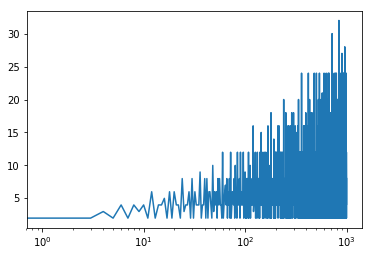

In [37]:
plt.semilogx(ys)

In [47]:
%timeit pe179(100)

893 µs ± 152 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [48]:
%timeit pe179(1000)

33.3 ms ± 8.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [49]:
%timeit pe179(10000)

2.43 s ± 461 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [50]:
%timeit pe179(100000)

5min 40s ± 51.8 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
%timeit pe179(10000) #old

9 s ± 439 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
from time import clock

In [42]:
a = clock()
pe179(10000000)
print(clock()-a)

KeyboardInterrupt: 

In [ ]:
pe179(10000000)